In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import joblib

In [16]:
df=pd.read_csv('solar_power_output.csv')
df

,temperature,humidity,solar_irradiance,wind_speed,solar_power_output
0,19.363503,75.852937,266.619636,5.190818,128.101772
1,33.767858,62.887709,587.710853,4.791819,290.911789
2,28.299849,44.762209,885.651252,0.256421,442.336390
3,24.966462,85.103602,759.002398,3.412478,380.261988
4,13.900466,74.778494,825.905033,3.801956,415.931953
...,...,...,...,...,...
495,18.833806,27.326566,701.391519,6.569552,352.480220
496,24.591403,93.385086,657.541311,9.566146,326.834297
497,11.943366,30.945490,517.144639,0.689580,259.133251
498,34.359870,96.018988,441.807202,0.570547,223.778239


In [30]:
X=df[['temperature','humidity','solar_irradiance','wind_speed']]
y=df['solar_power_output']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [36]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred=model.predict(X_test)
y_pred

array([145.57713107,  58.80813607, 162.02529472, 389.82145928,
       499.91950594, 201.0282157 , 280.32773311, 343.94995963,
       207.65845171, 274.08855807, 270.4758993 ,  71.45181397,
       429.2717113 , 474.93452177, 131.00879232, 488.72382531,
       351.97648481,  66.01156114, 286.53039285, 315.26996554,
       156.25649583, 217.68415494, 328.50926609, 456.09724416,
       224.5996492 , 343.33441394, 258.65661936, 253.27035924,
       487.33886964, 488.13938702, 352.87341423, 139.35221981,
       486.2457442 , 166.59050109, 443.99714231, 498.93693591,
       440.23818941, 184.21480104, 497.81182991, 239.22808162,
       345.26650268, 281.34107991, 215.84679473, 472.53738059,
       105.19383876, 353.92961078, 132.62179771, 496.30985098,
       472.03357268, 464.32390435,  68.39576647, 337.05784428,
       271.45779664, 142.00782194, 330.57420011, 209.16463829,
       431.33413852, 460.5254782 , 271.68335513, 148.17216826,
       322.32496321, 189.54364635, 148.80585848,  54.32

In [32]:
import matplotlib.pyplot as plt

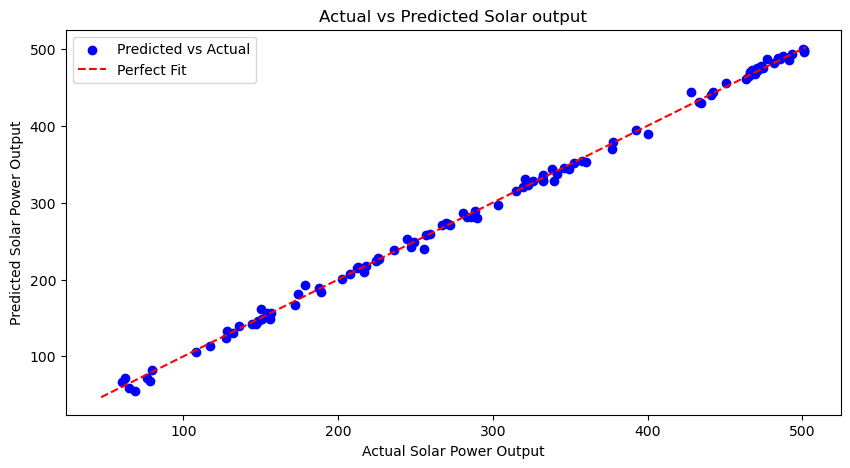

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(),y.max()],[y.min(),y.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual Solar Power Output")
plt.ylabel("Predicted Solar Power Output")
plt.title("Actual vs Predicted Solar output")
plt.legend()
plt.show()

In [40]:
joblib.dump(model,'solar_power_prediction_model.pkl')

['solar_power_prediction_model.pkl']

In [ ]:
model=joblib.load('solar_power_prediction_model.pkl')
new_data=np.array([[45.5,20.3,14.32,30.6]])
predicted_output=model.predict(new_data)
print(f"The predicted Solar Power Output for the New data is:{predicted_output[